In [21]:
from Code.utils import CremaD

In [22]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)
dataset = CMD.getData()
dataset.head()

,Path,Emotions
0,./dataset/test/1061_ITH_DIS_XX.wav,disgust
1,./dataset/test/1043_IWL_ANG_XX.wav,angry
2,./dataset/test/1075_IEO_ANG_HI.wav,angry
3,./dataset/test/1052_WSI_DIS_XX.wav,disgust
4,./dataset/test/1025_IEO_FEA_MD.wav,fear


In [5]:
print(f"There are {len(CMD)} samples in the dataset")
print("First Value")
mel_signal, label = CMD[0]
print(mel_signal.shape, label)

There are 1489 samples in the dataset
First Value
torch.Size([1, 53, 101]) 3


In [6]:
dataset["Emotions"].value_counts()

fear       255
happy      254
angry      254
disgust    254
sad        254
neutral    218
Name: Emotions, dtype: int64

# Train Test Data Split

In [5]:
# Data splitting
from sklearn.model_selection import train_test_split
import pandas as pd
X = dataset.drop(columns=["Emotions"])
y = dataset["Emotions"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

test = pd.concat([X_test, y_test], axis=1)
train = pd.concat([X_train, y_train], axis=1)
print(f"Test Set Data : {len(test)}")
print(test["Emotions"].value_counts())
print(f"Train Set Data : {len(train)}")
print(train["Emotions"].value_counts())

Test Set Data : 1489
fear       255
happy      254
sad        254
angry      254
disgust    254
neutral    218
Name: Emotions, dtype: int64
Train Set Data : 5953
5953
angry      1017
disgust    1017
happy      1017
sad        1017
fear       1016
neutral     869
Name: Emotions, dtype: int64


In [6]:
# Move data
import os
import shutil

# List of filenames to move
test_list = test["Path"].tolist()
test_list = [i.split('/')[2] for i in test_list]
train_list = train["Path"].tolist()
train_list = [i.split('/')[2] for i in train_list]
# Source directory where the files are currently located
source_dir = './dataset/'
# Destination directory where the files will be moved to
dest_dir = './dataset/test/'
dest_dir2 = './dataset/train/'

# Loop through the file list and move each file to the destination directory
for x in test_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir)
        print(f"Moved {x} to {dest_dir}")
    else:
        print(f"{x} does not exist in {source_dir}")

for x in train_list:
    if os.path.isfile(source_dir + x):
        shutil.move(source_dir + x, dest_dir2)
        print(f"Moved {x} to {dest_dir2}")
    else:
        print(f"{x} does not exist in {source_dir}")

Moved 1046_MTI_HAP_XX.wav to ./dataset/test/
Moved 1008_IEO_SAD_HI.wav to ./dataset/test/
Moved 1077_IEO_FEA_LO.wav to ./dataset/test/
Moved 1080_MTI_ANG_XX.wav to ./dataset/test/
Moved 1038_ITS_NEU_XX.wav to ./dataset/test/
Moved 1055_DFA_DIS_XX.wav to ./dataset/test/
Moved 1017_IWW_DIS_XX.wav to ./dataset/test/
Moved 1058_DFA_ANG_XX.wav to ./dataset/test/
Moved 1034_IWW_HAP_XX.wav to ./dataset/test/
Moved 1088_IWW_HAP_XX.wav to ./dataset/test/
Moved 1027_WSI_DIS_XX.wav to ./dataset/test/
Moved 1080_IOM_NEU_XX.wav to ./dataset/test/
Moved 1082_MTI_ANG_XX.wav to ./dataset/test/
Moved 1051_TSI_HAP_XX.wav to ./dataset/test/
Moved 1036_IEO_DIS_LO.wav to ./dataset/test/
Moved 1072_ITS_SAD_XX.wav to ./dataset/test/
Moved 1023_IWW_DIS_XX.wav to ./dataset/test/
Moved 1016_TAI_NEU_XX.wav to ./dataset/test/
Moved 1002_MTI_HAP_XX.wav to ./dataset/test/
Moved 1022_MTI_FEA_XX.wav to ./dataset/test/
Moved 1044_TAI_HAP_XX.wav to ./dataset/test/
Moved 1051_IEO_DIS_MD.wav to ./dataset/test/
Moved 1002

# Exploritory Data Analysis

<AxesSubplot: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

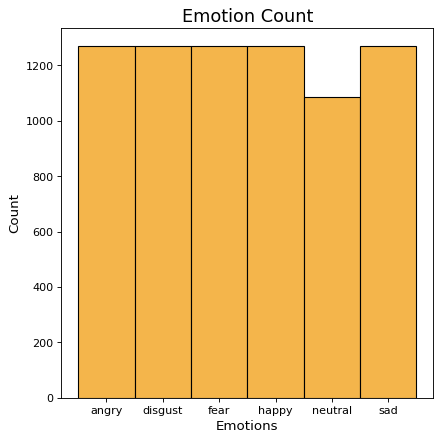

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')

AudioMetaData(sample_rate=16000, num_frames=32032, num_channels=1, bits_per_sample=16, encoding=PCM_S)


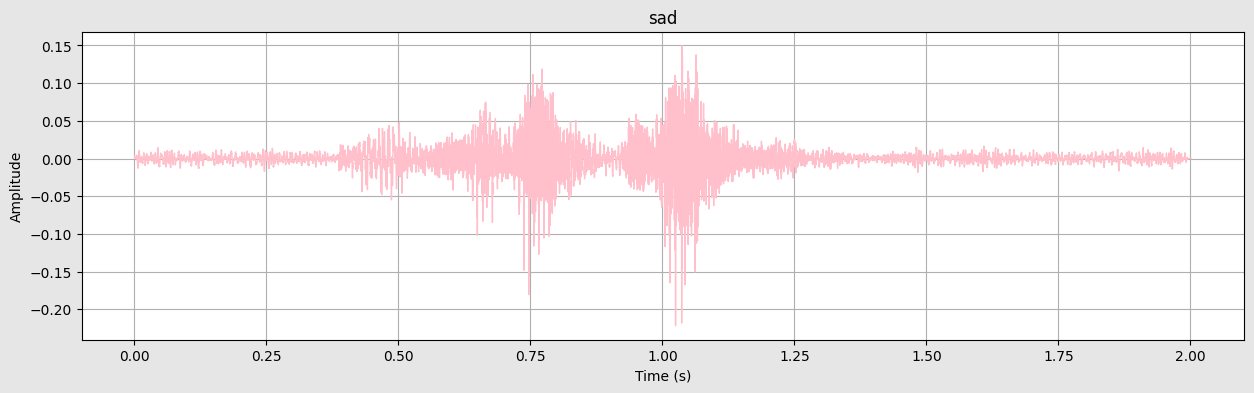

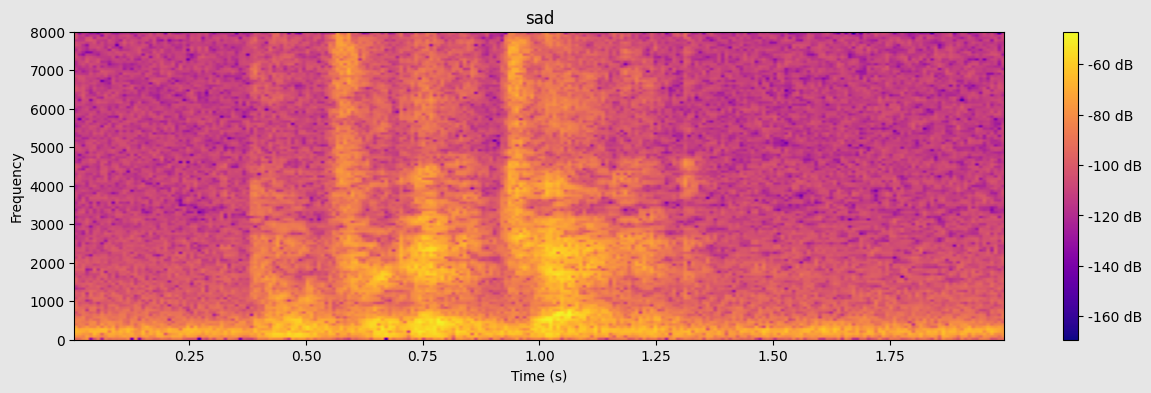

In [3]:
idx = 5
CMD.audio_info(idx)
CMD.play_audio(idx)
# using ipython audio libary
CMD.plot_waveform(idx)
# using matplotlib spectogram library
CMD.plot_spectogram(idx)

# Feature Extraction

### Deep Learning Features

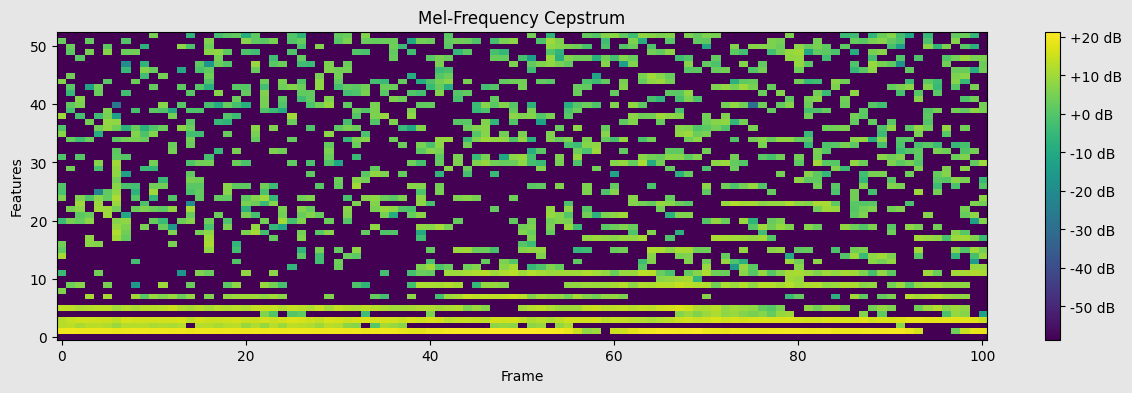

In [1]:
from Code.utils import CremaD, audio_extraction

SAMPLE_RATE = 22050

NUM_SAMPLE = 22050
CMD = CremaD(path="./dataset/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)

idx = 5
CMD.plot_mfcc(idx)

### Conventional ML Features

In [7]:
file = dataset["Path"][:2]
print(file)
X_mfcc = file.apply(lambda x: audio_extraction.mfcc_formula(x))
X_mfcc

0    ./dataset/1001_DFA_ANG_XX.wav
1    ./dataset/1001_DFA_DIS_XX.wav
Name: Path, dtype: object


0    [-493.19052, 130.57959, -15.17191, 47.93188, -...
1    [-533.95325, 136.55078, -23.712204, 57.03613, ...
Name: Path, dtype: object

In [1]:
from Code.utils import audio_extraction
X_mfcc = audio_extraction("./dataset/test/").extract_audio()
X_mfcc

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,Emotions
0,-239.222382,92.708702,-8.801511,25.258366,-17.419712,10.042056,-28.147316,5.744790,-12.934449,6.081401,...,-2.178592,-1.225178,-0.534631,-1.969897,-2.114515,-0.348125,-1.192972,-1.552364,-1.691586,disgust
1,-203.185715,84.806328,-12.538840,27.457197,-26.917536,-6.674940,-17.444019,-1.139387,-21.272219,3.049414,...,-0.248390,-0.907883,-0.818774,-2.351401,-2.442497,-1.124403,-0.900273,-1.898185,-2.020319,angry
2,-217.294296,65.713570,9.069518,27.177517,-26.088106,-3.154654,-17.736217,-0.732401,-17.330029,-2.378236,...,-1.729068,-1.165188,-0.342098,-1.599014,-1.077120,-1.761797,-1.618434,-1.532290,-0.997753,angry
3,-273.571655,87.737488,8.457440,30.764313,-25.590876,11.761774,-23.836887,8.899585,-18.886089,5.712990,...,-2.042722,-2.306011,-0.792711,-1.507414,-2.380720,-1.910109,-1.669974,-2.091234,-2.479256,disgust
4,-327.628418,83.762733,20.574173,50.008873,-16.673550,23.327335,-26.056072,8.000726,-22.025608,4.273860,...,-1.238540,-2.484384,-1.211938,-3.164426,-0.916625,-2.379612,-1.016525,-2.727374,-0.275224,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,-264.930115,95.064232,5.068409,33.826687,-18.333403,16.264126,-25.251215,8.038420,-14.150048,4.698171,...,-0.390279,-1.655446,-1.500083,-1.639782,-1.988439,-1.273082,-2.443652,-2.752622,-1.307977,sad
1485,-134.304459,79.264641,-15.946712,15.343717,-25.977596,-9.074088,-22.308908,2.095305,-21.848255,-1.931158,...,-1.981994,-2.158565,-0.650452,-2.176030,-1.547771,-1.513360,-1.152214,-1.481846,-0.835401,angry
1486,-195.412766,82.748009,-6.040087,25.225163,-30.008570,-1.875896,-15.716959,4.537230,-18.117958,3.613259,...,-0.335841,-1.657046,-2.316673,-1.220992,-1.007144,-1.977890,-1.971581,-2.268168,-1.252753,neutral
1487,-307.803650,90.119164,17.425426,39.700531,-25.943275,14.362914,-23.094284,7.223184,-23.313358,2.643680,...,-1.309260,-2.066976,-0.785673,-1.849556,-1.878294,-1.938133,-1.223205,-2.002760,-1.154836,fear


# SVM Model

In [9]:
import numpy as np
def reverse_label_encoder(data):
    mapping = {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
    reverse_mapping_dict = {v: k for k, v in mapping.items()}
    return [reverse_mapping_dict[label] for label in data]

prediction =  0
print(reverse_label_encoder([prediction]))

['angry']


In [124]:
import librosa
from Code.utils import CremaD
import torchaudio
y,sr = librosa.load("./dataset/test/1001_DFA_HAP_XX.wav")
waveform, sampleRate = torchaudio.load("./dataset/test/1001_DFA_HAP_XX.wav")
print(y.shape,sr)
print(waveform.shape, sampleRate)

SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
CMD = CremaD(path="./dataset/test/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)
dataset = CMD.getData()
path = dataset["Path"]
print(len(path))
signals = []
labels = []
for idx in range(len(path)):
    signal, label = CMD[idx]
    signals.append(signal)
    labels.append(label)
print(labels)
print(len(labels))

(41201,) 22050
torch.Size([1, 29896]) 16000
1489
[2, 0, 0, 2, 1, 2, 3, 3, 1, 3, 0, 1, 2, 5, 1, 3, 5, 2, 2, 1, 1, 0, 1, 1, 4, 0, 4, 4, 3, 1, 1, 4, 3, 4, 3, 4, 5, 0, 2, 4, 1, 3, 3, 2, 4, 2, 3, 0, 2, 0, 5, 2, 0, 1, 0, 3, 1, 0, 4, 0, 5, 0, 2, 5, 2, 0, 4, 3, 5, 1, 2, 1, 0, 4, 1, 3, 0, 4, 2, 3, 0, 1, 5, 5, 5, 2, 4, 5, 1, 4, 0, 3, 4, 4, 2, 5, 1, 0, 1, 1, 2, 2, 1, 2, 4, 0, 4, 0, 2, 0, 1, 3, 1, 0, 1, 0, 4, 2, 1, 5, 3, 3, 3, 2, 4, 5, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 2, 2, 0, 4, 5, 3, 0, 0, 0, 4, 5, 5, 1, 1, 1, 3, 3, 0, 5, 0, 3, 2, 3, 1, 0, 2, 5, 1, 4, 0, 5, 5, 4, 1, 3, 2, 5, 3, 5, 5, 2, 1, 3, 5, 4, 5, 1, 4, 0, 2, 5, 2, 3, 4, 1, 0, 1, 4, 2, 3, 0, 1, 3, 3, 0, 4, 3, 0, 2, 0, 1, 3, 5, 0, 2, 3, 5, 5, 5, 2, 4, 0, 1, 2, 2, 5, 1, 1, 5, 5, 1, 0, 4, 3, 3, 2, 0, 1, 4, 3, 2, 4, 4, 1, 1, 4, 5, 3, 4, 0, 2, 1, 5, 2, 2, 2, 4, 1, 3, 0, 3, 1, 3, 5, 4, 3, 5, 1, 0, 3, 1, 5, 2, 3, 5, 2, 5, 4, 0, 2, 3, 3, 1, 3, 0, 5, 3, 3, 1, 3, 2, 0, 0, 0, 3, 3, 4, 5, 0, 5, 2, 0, 4, 5, 5, 0, 4, 1, 0, 2, 3, 4, 0, 4, 3, 1, 4, 0, 4, 3, 1,

In [154]:
######################## DONE
import torch
import numpy as np
import pandas as pd
signal1, label = CMD[0]
signal2, label2 = CMD[1]

signal = []
for x in range(2):
    mfcc_signal, _ = CMD[x]
    signal.append(mfcc_signal.numpy().reshape(mfcc_signal.size(1), mfcc_signal.size(2)))

print(signal[0].shape)
feature = np.mean(signal, axis=-1)
print(feature.shape)
pd.DataFrame(feature)
# print(signal1.shape)
# print(signal1.size(1))
# li = [signal1.numpy().reshape(signal1.size(1),signal1.size(2)), signal2.numpy().reshape(signal1.size(1),signal1.size(2))]
# print(li[0].shape)
# print(li[1].shape)
# print(li)
# feature = np.mean(li, axis=-1)
# print(feature.shape)
# # print(feature)
# pd.DataFrame(feature)
# print(feature[0][0])
# print(feature[1][0])


# signal1.numpy().T.shape
# feature = np.mean(li.numpy().T.shape, axis=0)
# feature
# concatenated_frames = torch.cat(li, dim=0)
# print(concatenated_frames.shape)
# print(concatenated_frames[0][0])
# concatenate_list = concatenated_frames.numpy()
# concatenate_list.shape
# np.mean()
# features_list = []
# for i in range(concatenated_frames.size(0)):
#     sample_features = concatenated_frames[i].view(-1).numpy()
#     features_list.append(sample_features)

# feature = pd.DataFrame(features_list)
# feature["Emotions"] = labels
# feature

(53, 101)
(2, 53)


,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-239.222382,92.708702,-8.801511,25.258366,-17.419712,10.042056,-28.147316,5.744790,-12.934449,6.081401,...,-2.044018,-2.178592,-1.225178,-0.534631,-1.969897,-2.114515,-0.348125,-1.192972,-1.552364,-1.691586
1,-203.185715,84.806328,-12.538840,27.457197,-26.917536,-6.674940,-17.444019,-1.139387,-21.272219,3.049414,...,-1.110844,-0.248390,-0.907883,-0.818774,-2.351401,-2.442497,-1.124403,-0.900273,-1.898185,-2.020319


In [1]:
from Code.utils import load_model

# dataset = data_loader('./dataset/', 22050, 22050).getData()
# # {'angry': 0, 'fear': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
# paths = dataset["Path"].to_numpy()
# paths = paths[:5]
# for x in paths:
    # emotions = x.split("_")
# print(emotions[2])
# print(load_model(x, 'svm_model.sav').getModelPrediction())
load_model("./dataset/test/1001_DFA_HAP_XX.wav", "svm_model.sav").getModelPrediction()

{'angry': 0.08938872444299124,
 'fear': 0.23824526176181654,
 'disgust': 0.08878580486246093,
 'happy': 0.506811699417121,
 'neutral': 0.04408121208886128,
 'sad': 0.032687297426748974}

# CNN Model

In [5]:
from Code.utils import data_loader
from Code.cnn import CNNNetwork
from torch.utils.data import DataLoader
from torch import nn
import torch

### Training

In [6]:
def create_data_loader(train_data, BATCHSIZE):
    train_dataLoader = DataLoader(train_data, batch_size=BATCHSIZE)
    return train_dataLoader

def train_single_epoch(model, data_loader, loss_fn, optimiser, device):
    for input, target in data_loader:
        input, target = input.to(device), target.to(device)

        prediction = model(input)
        loss = loss_fn(prediction, target)

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

def train(model, data_loader, loss_fn, optimiser, epochs, device):
    for i in range(epochs):
        print(f"Ephocs {i+1}")
        train_single_epoch(model, data_loader, loss_fn, optimiser, device)
        print("-------------------")
    print("Finished")

In [4]:
model = CNNNetwork().to("cuda")
print('Number of trainable params: ',sum(p.numel() for p in model.parameters()))

Number of trainable params:  112518


In [10]:
SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001
device = "cuda"
loader = data_loader(path="./dataset/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)

train_dataLoader = create_data_loader(loader, BATCH_SIZE)
print(list(train_dataLoader))
# cnn = CNNNetwork().to(device)
# print(cnn)

# loss_fn = nn.CrossEntropyLoss()
# optimiser = torch.optim.Adam(cnn.parameters(), lr = LEARNING_RATE)

# train(cnn, train_dataLoader, loss_fn, optimiser, EPOCHS, device)

# torch.save(cnn.state_dict(), "cnnModel.pth")
# print("Trained feed forward net saved at cnnModel.pth")

KeyboardInterrupt: 

### Prediction

In [7]:
def predict(model, input, target, class_mapping):
    model.eval()
    with torch.no_grad():
        model = model.cuda()
        predictions = model(input)
        predicted_index = predictions[0].argmax(0)
        predicted = class_mapping[predicted_index]
        expected = class_mapping[target]
    return predicted, expected

In [8]:
class_map = ['angry', 'fear', 'disgust', 'happy', 'neutral', 'sad']

cnn = CNNNetwork()
state_dict = torch.load("./cnnModel.pth")
cnn.load_state_dict(state_dict)


SAMPLE_RATE = 22050
NUM_SAMPLE = 22050
loader = data_loader(path="./dataset/", sample_rate=SAMPLE_RATE, num_samples=NUM_SAMPLE)

for idx in range(30):
    input, target = loader[idx][0], loader[idx][1] # (batch, channels, fr, time)
    input.unsqueeze_(0)

    predicted, expected = predict(cnn, input, target, class_map)
    print(f"Predicted: {predicted}, Expected: {expected}")

Predicted: neutral, Expected: angry
Predicted: neutral, Expected: disgust
Predicted: disgust, Expected: fear
Predicted: neutral, Expected: happy
Predicted: neutral, Expected: neutral
Predicted: disgust, Expected: sad
Predicted: neutral, Expected: angry
Predicted: disgust, Expected: angry
Predicted: disgust, Expected: angry
Predicted: neutral, Expected: disgust
Predicted: sad, Expected: disgust
Predicted: neutral, Expected: disgust
Predicted: neutral, Expected: fear
Predicted: neutral, Expected: fear
Predicted: neutral, Expected: fear
Predicted: neutral, Expected: happy
Predicted: neutral, Expected: happy
Predicted: neutral, Expected: happy
Predicted: neutral, Expected: neutral
Predicted: neutral, Expected: sad
Predicted: disgust, Expected: sad
Predicted: neutral, Expected: sad
Predicted: disgust, Expected: angry
Predicted: disgust, Expected: disgust
Predicted: neutral, Expected: fear
Predicted: neutral, Expected: happy
Predicted: disgust, Expected: neutral
Predicted: neutral, Expected:

'happy'

In [19]:
signal, sr = torchaudio.load("./dataset/1001_DFA_ANG_XX.wav")

In [58]:
signal

tensor([[-0.0043, -0.0033, -0.0030,  ..., -0.0001, -0.0002, -0.0002]])

In [21]:
sr

16000